# Applying XGBoost and Random Forest to a count problem

Example for generating the data is here: 
    
https://www.theanalysisfactor.com/generalized-linear-models-in-r-part-6-poisson-regression-count-variables/

In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
days = [1, 2, 3, 3, 4, 4, 4, 6, 7, 8, 
        8, 8, 8, 12, 14, 15, 17, 17, 17, 18, 19, 19, 20, 
        23, 23, 23, 24, 24, 25, 26, 27, 28, 29, 34, 36, 36, 
        42, 42, 43, 43, 44, 44, 44, 44, 45, 46, 48, 48, 49, 
        49, 53, 53, 53, 54, 55, 56, 56, 58, 60, 63, 65, 67, 
        67, 68, 71, 71, 72, 72, 72, 73, 74, 74, 74, 75, 75, 
        80, 81, 81, 81, 81, 88, 88, 90, 93, 93, 94, 95, 95, 
        95, 96, 96, 97, 98, 100, 101, 102, 103, 104, 105, 
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115]

students = [6, 8, 12, 9, 3, 3, 11, 5, 7, 3, 8, 
            4, 6, 8, 3, 6, 3, 2, 2, 6, 3, 7, 7, 2, 2, 8, 
            3, 6, 5, 7, 6, 4, 4, 3, 3, 5, 3, 3, 3, 5, 3, 
            5, 6, 3, 3, 3, 3, 2, 3, 1, 3, 3, 5, 4, 4, 3, 
            5, 4, 3, 5, 3, 4, 2, 3, 3, 1, 3, 2, 5, 4, 3, 
            0, 3, 3, 4, 0, 3, 3, 4, 0, 2, 2, 1, 1, 2, 0, 
            2, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 
            0, 1, 1, 0, 0, 0, 0, 0]

In [3]:
dat = np.array([days, students]).T
df = pd.DataFrame(dat, columns = ['days', 'students'])

X_train = df[['days']]
y_train = df.students

In [4]:
xgbml2 = XGBRegressor(max_depth=2, n_estimators=100, seed=42, eta=0.3, objective='reg:squarederror', subsample=0.1)
xgbmpoi = XGBRegressor(max_depth=2, n_estimators=100, seed=42, eta=0.3, objective='count:poisson', subsample=0.1)
rfm = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=42, bootstrap=True, max_samples=0.1)

xgbml2.fit(
    X_train, 
    y_train)

xgbmpoi.fit(
    X_train, 
    y_train)

rfm.fit(
    X_train, 
    y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=0.1, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [5]:
yhat_xgbl2 = xgbml2.predict(X_train)
yhat_xgbpoi = xgbmpoi.predict(X_train)
yhat_rf = rfm.predict(X_train)

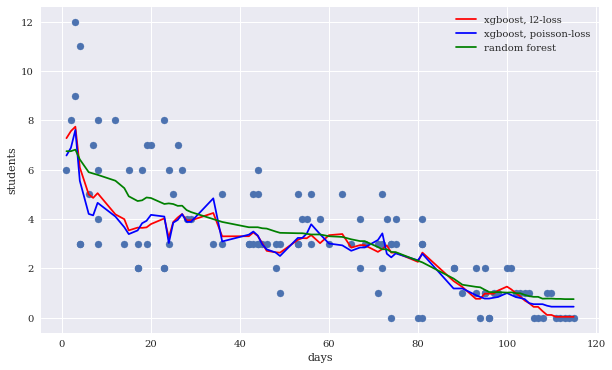

In [6]:
f, ax = plt.subplots(1,1,figsize=(10, 6))
ax.scatter(df.days, df.students)
ax.plot(df.days, yhat_xgbl2, color='red', label='xgboost, l2-loss')
ax.plot(df.days, yhat_xgbpoi, color='blue', label='xgboost, poisson-loss')
ax.plot(df.days, yhat_rf, color='green', label='random forest')
ax.set_xlabel('days')
ax.set_ylabel('students')
ax.legend()
plt.show()